<b>Neural Network Model</b>

We want to see how different model perform with the same dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DATADIR = "DATASET"
CATEDIR = ["White","Red","Green","Blue","Black"]

In [3]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for class_folder in CATEDIR:
        path = DATADIR+"/"+class_folder
        # give an index to each class folder
        class_index = CATEDIR.index(class_folder)
        for img in os.listdir(path):
            img_array = cv2.imread(path+"/"+img)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
            training_data.append([new_array, class_index])
create_training_data()

In [4]:
import random
random.shuffle(training_data)

In [5]:
X = []
y = []

for images, classes in training_data:
    X.append(images)
    y.append(classes)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [6]:
X.shape, y.shape

((3038, 100, 100, 3), (3038,))

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   shuffle = True) 

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, len(CATEDIR))
y_test = to_categorical(y_test, len(CATEDIR))

In [10]:
X_train.shape, y_train.shape

((2126, 100, 100, 3), (2126, 5))

<b>Model_v1 : </b><br>
3 Convolutional layers, 2 Dense Layers

In [11]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dense(len(CATEDIR), activation = "softmax"))

model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_test, y_test), verbose = 0)

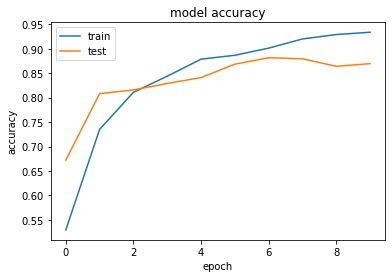

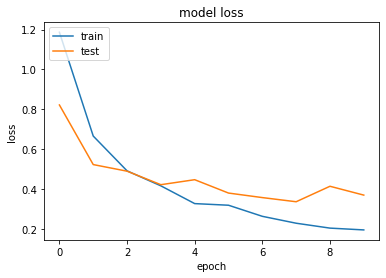

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Mean Squared Error Train:\t {:0.4f}" .format(mean_squared_error(y_train, y_train_pred)))
print("Mean Squared Error Test:\t {:0.4f}" .format(mean_squared_error(y_test, y_test_pred)))
print("R2 score Train:\t {:0.4f}" .format(r2_score(y_train, y_train_pred)))
print("R2 score Test:\t {:0.4f}" .format(r2_score(y_test, y_test_pred)))

Mean Squared Error Train:	 0.0168
Mean Squared Error Test:	 0.0381
R2 score Train:	 0.8947
R2 score Test:	 0.7571


<b>Model_v2 : </b><br>
Activation Tanh

In [14]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "tanh"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "tanh"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "tanh"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = "tanh"))
model.add(Dense(len(CATEDIR), activation = "softmax"))

model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_test, y_test), verbose = 0)

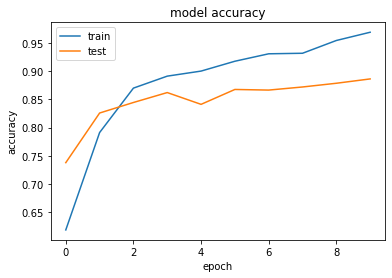

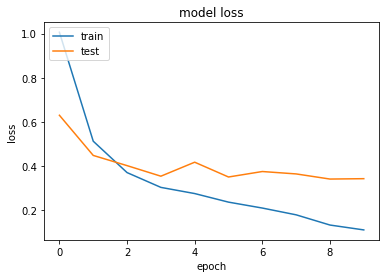

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Mean Squared Error Train:\t {:0.4f}" .format(mean_squared_error(y_train, y_train_pred)))
print("Mean Squared Error Test:\t {:0.4f}" .format(mean_squared_error(y_test, y_test_pred)))
print("R2 score Train:\t {:0.4f}" .format(r2_score(y_train, y_train_pred)))
print("R2 score Test:\t {:0.4f}" .format(r2_score(y_test, y_test_pred)))

Mean Squared Error Train:	 0.0065
Mean Squared Error Test:	 0.0353
R2 score Train:	 0.9592
R2 score Test:	 0.7730


<b>Model_v3 : </b><br>
Optimizer RMSprop

In [17]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dense(len(CATEDIR), activation = "softmax"))

model.compile(loss = "categorical_crossentropy", 
              optimizer = "rmsprop", 
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_test, y_test), verbose = 0)

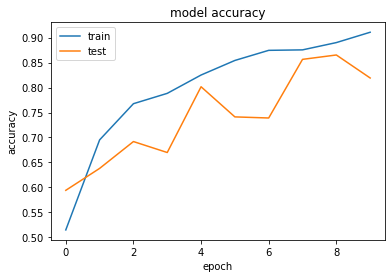

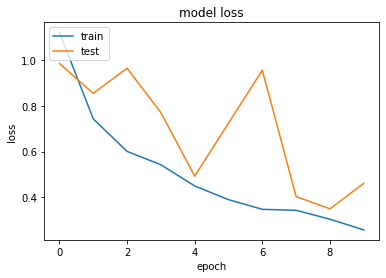

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Mean Squared Error Train:\t {:0.4f}" .format(mean_squared_error(y_train, y_train_pred)))
print("Mean Squared Error Test:\t {:0.4f}" .format(mean_squared_error(y_test, y_test_pred)))
print("R2 score Train:\t {:0.4f}" .format(r2_score(y_train, y_train_pred)))
print("R2 score Test:\t {:0.4f}" .format(r2_score(y_test, y_test_pred)))

Mean Squared Error Train:	 0.0385
Mean Squared Error Test:	 0.0500
R2 score Train:	 0.7579
R2 score Test:	 0.6852


<font size='2.4'><b>Model_v4 : </b></font><br>
5 Convolutional Layers, 3 Dense Layers

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(len(CATEDIR), activation = "softmax"))

model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_test, y_test), verbose = 0)

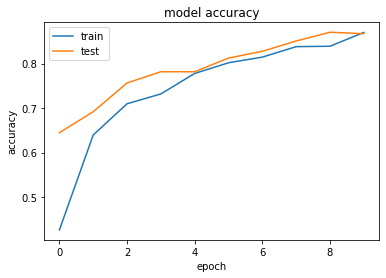

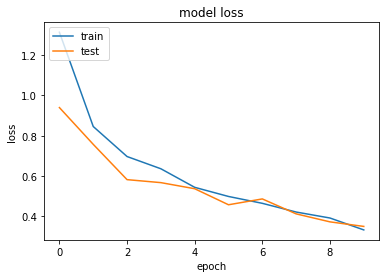

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Mean Squared Error Train:\t {:0.4f}" .format(mean_squared_error(y_train, y_train_pred)))
print("Mean Squared Error Test:\t {:0.4f}" .format(mean_squared_error(y_test, y_test_pred)))
print("R2 score Train:\t {:0.4f}" .format(r2_score(y_train, y_train_pred)))
print("R2 score Test:\t {:0.4f}" .format(r2_score(y_test, y_test_pred)))

Mean Squared Error Train:	 0.0304
Mean Squared Error Test:	 0.0375
R2 score Train:	 0.8021
R2 score Test:	 0.7549
